In [2]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the dataset
From:
Hasrat, Raiza, et al. "Benchmarking laboratory processes to characterise low-biomass respiratory microbiota." Scientific Reports 11.1 (2021): 17148.

Accession number: PRJNA718293

In [7]:
dat=ca.read_amplicon('./all.biom','./map.txt',normalize=10000,min_reads=1000)

2023-05-11 16:56:56 INFO loaded 1198 samples, 8823 features
2023-05-11 16:56:56 INFO Loaded 1198 samples, 8823 features
2023-05-11 16:56:56 INFO After filtering, 1167 samples remaining.


### Keep only the negative controls and real samples
(throw away mock mixtures)

In [8]:
tt=dat.filter_samples('iso_co_type',['Zymo','Zm','mock'],negate=True)
tt=tt.filter_samples('Type','ms_co',negate=True)

## Keep only sequences present in >5% of samples

In [9]:
tt=tt.filter_prevalence(0.05)

2023-05-11 16:56:56 INFO After filtering, 445 features remaining.


In [10]:
tt=tt.cluster_features(10)

2023-05-11 16:56:56 INFO After filtering, 445 features remaining.


# Add dbbact term with the highest f-score out of:
'skin','nasopharynx','saliva','feces','soil','water','contaminant'

In [11]:
tt=tt.add_terms_to_features('dbbact',['skin','nasopharynx','saliva','feces','soil','water','contaminant'],get_contaminant=1)

2023-05-11 16:56:57 INFO Getting dbBact annotations for 445 sequences, please wait...
2023-05-11 16:57:04 INFO got 5960 annotations
2023-05-11 16:57:04 INFO Got 66022 annotation-sequence pairs
2023-05-11 16:57:04 INFO Added annotation data to experiment. Total 5960 annotations, 445 ASVs


## Also generate a colorbar for the direction (higher in blanks or higher in samples)

In [12]:
gg=tt.aggregate_by_metadata('Type',axis='s')

In [13]:
tt.feature_metadata['higher']=np.array(gg.data[0,:]-gg.data[1,:]>0).astype(str)

# Now plot the heatmap acording to dbbact term with highest f-score

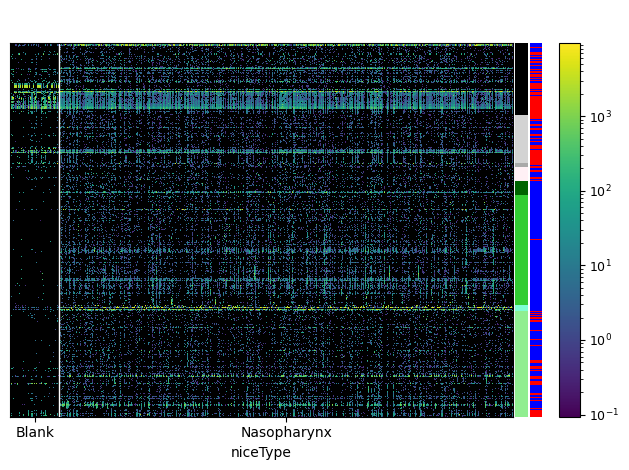

In [14]:
tt=tt.sort_by_metadata('common_term',axis='f')

tt.feature_metadata['forder']=1
tt.feature_metadata.loc[tt.feature_metadata.common_term=='skin','forder']=10
tt.feature_metadata.loc[tt.feature_metadata.common_term=='nasopharynx','forder']=9
tt.feature_metadata.loc[tt.feature_metadata.common_term=='saliva','forder']=8
tt.feature_metadata.loc[tt.feature_metadata.common_term=='feces','forder']=7
tt.feature_metadata.loc[tt.feature_metadata.common_term=='soil','forder']=3
tt.feature_metadata.loc[tt.feature_metadata.common_term=='water','forder']=4
tt.feature_metadata.loc[tt.feature_metadata.common_term=='contaminant','forder']=2
tt.feature_metadata.loc[tt.feature_metadata.common_term=='na','forder']=5
tt.feature_metadata.loc[tt.feature_metadata.common_term=='other','forder']=6
tt=tt.sort_by_metadata('forder',axis='f')
tt=tt.sort_samples('Type')
tt.sample_metadata['niceType']=tt.sample_metadata['Type']
tt.sample_metadata.loc[tt.sample_metadata.Type=='sample','niceType']='Nasopharynx'
tt.sample_metadata.loc[tt.sample_metadata.Type=='iso_co','niceType']='Blank'
f=tt.plot(sample_field='niceType',bary_fields=['common_term','higher'],bary_colors={'skin':'lightgreen','nasopharynx':'aquamarine','saliva':'limegreen','feces':'darkgreen','soil':'lightgrey','water':'darkgrey','contaminant':'black','na':'lavenderblush','other':'lavenderblush','True':'blue','False':'red'},bary_label=False,gui='cli',xticklabel_kwargs={'rotation':0})
# cu.splot(tt,'Type',bary_fields=['common_term','higher'],bary_colors={'skin':'lightgreen','nasopharynx':'green','saliva':'limegreen','feces':'darkgreen','soil':'lightgrey','water':'darkgrey','contaminant':'black','na':'lavenderblush','other':'lavenderblush','True':'blue','False':'red'},bary_label=False)

In [25]:
f.figure.savefig('./fig-contaminants.pdf',dpi=300,bbox_inches='tight')

## Also as interactive plot to examine the bacteria

In [16]:
tt=tt.sort_by_metadata('common_term',axis='f')

tt.feature_metadata['forder']=1
tt.feature_metadata.loc[tt.feature_metadata.common_term=='skin','forder']=10
tt.feature_metadata.loc[tt.feature_metadata.common_term=='nasopharynx','forder']=9
tt.feature_metadata.loc[tt.feature_metadata.common_term=='saliva','forder']=8
tt.feature_metadata.loc[tt.feature_metadata.common_term=='feces','forder']=7
tt.feature_metadata.loc[tt.feature_metadata.common_term=='soil','forder']=3
tt.feature_metadata.loc[tt.feature_metadata.common_term=='water','forder']=4
tt.feature_metadata.loc[tt.feature_metadata.common_term=='contaminant','forder']=2
tt.feature_metadata.loc[tt.feature_metadata.common_term=='na','forder']=5
tt.feature_metadata.loc[tt.feature_metadata.common_term=='other','forder']=6
tt=tt.sort_by_metadata('forder',axis='f')
tt=tt.sort_samples('Type')
tt.sample_metadata['niceType']=tt.sample_metadata['Type']
tt.sample_metadata.loc[tt.sample_metadata.Type=='sample','niceType']='Nasopharynx'
tt.sample_metadata.loc[tt.sample_metadata.Type=='iso_co','niceType']='Blank'
cu.splot(tt,'Type',bary_fields=['common_term','higher'],bary_colors={'skin':'lightgreen','nasopharynx':'green','saliva':'limegreen','feces':'darkgreen','soil':'lightgrey','water':'darkgrey','contaminant':'black','na':'lavenderblush','other':'lavenderblush','True':'blue','False':'red'},bary_label=False)